(20000,)
2011121
(20000,)
3210321
(20000,)
3210020
(20000,)
1113321


/home/oscar/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:11: DeprecationWarning: object of type <class 'numpy.float64'> cannot be safely interpreted as an integer.
  # This is added back by InteractiveShellApp.init_path()


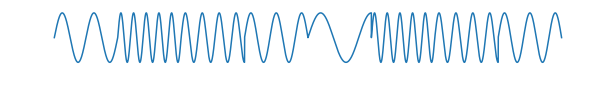

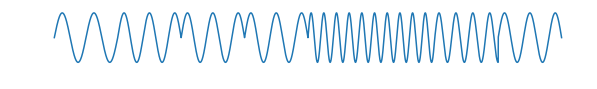

0001001010100110
0011011000110110
1111011000000100
1110101011110110


In [28]:
# Imports
import numpy as np
import matplotlib.pyplot as plt
import modem

SAMPLE_RATE = 20000
symbol_width = SAMPLE_RATE // 8
base_freq = 10
def generate_signal_raw(freq, num_samples):
    duration = num_samples / SAMPLE_RATE
    time = freq * 2.0 * np.pi * np.linspace(0, duration, np.floor(num_samples))
    return np.sin(time)

def generateSymbol(val: int) -> np.ndarray:
    freq = base_freq * (1 + val)
    return generate_signal_raw(freq, symbol_width)

sync = generate_signal_raw(16, SAMPLE_RATE / 8)
base = generate_signal_raw(base_freq, SAMPLE_RATE - (SAMPLE_RATE / 8))
signal = np.tile(np.concatenate((sync, base)), 4)
signal = np.roll(signal, 16000)

byte_string = b'Hello World'
vals = modem.split_byte_string(byte_string, 2)
bits = modem.split_byte_string(byte_string, 1)
signals = []
for i in range(4):
    signal = np.zeros((symbol_width*8,))
    print(signal.shape)
    signal[0:symbol_width] = sync
    for j in range(1,8):
        print(vals[i*8+j], end='')
        signal[symbol_width*j:symbol_width*(j+1)] = generateSymbol(vals[i*8+j])
    signals.append(signal)
    print('')

plt.plot(range(sync.size), sync)
plt.show()


for i in range(len(signals)):
    signal = signals[i]
    plt.figure(figsize=(10,1))
    plt.axis('off')
    plt.plot(range(signal.size), signal)
    plt.savefig('HelloWorldSignal_%d.png' % i, dpi=900)
    plt.show()

for j in range(4):
    for i in range(2*8):
        print("%d" % bits[j*2*8 + i], end='')
    print('')